In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### New functions we will use in this module

| Function Name            | What it does |
| - | - |
| plt.imshow               | Plot a 2-dimensional array of values as a color image |
| plt.colorbar             | Attach an color axes label to a figure |

### Scientific Context

Recall this figure illustrating Hubble's Law:

<img src="figures/hubble_constant_far.jpg" width="40%"/>

Many of you noted that the error bars where shown on the x-axis (i.e., the distance) rather than the y-axis (i.e., the velocity).

The reason for that is that it is harder to measure the distance to faraway galaxies than it is to measure the velocity at which they are moving.  Later in the course we will do a notebook where we will measure the Doppler shifts used to measure the velocities of distance galaxies, and you will see that we can be quite accurate.

For distances, we have to use what is called the "distance ladder" wherein we measure the distance to nearby objects, then use those to calibrate more distance object.  

### How not to measure the area of your desk or table.

By way of analogy to one of the techniques used to measure the Hubble constant, let's measure the area of the desk or table that you are working at in a really complicated and inaccurate fashion.  Let's assume you have a rectangular table like I do.

1. Take a card from your wallet or bag, maybe an ID card, or a business card, or a debit card or whatever.
2. Estimate the length of the card, in centimeters.  Let's call that $C$.  E.g., for me, I'm using a debit card from my wallet and I estimate $C \sim 8 {\rm cm}$.
3. Find a book, something that is a few times longer than the card.  Now measure the length of the book using the card.  Let's call that $B$.  E.g., for me, i'm using a Moleskine notebook that was sitting on my desk and I measured $B \sim 2.5$ cards.
4. Now measure the length and width of the table, using the book. Let's call these $l$ and $w.$  For me, I measure $w \sim 5.1$ and $l \sim 3.8$ books.
5. Now we do the math and estimate the area of the desk. 

The width of the desk in cm is $(w * B * C)$, the length in cm is  $(l * B * C)$, so the area is

$A = (w * B * C)(l * B * C)$ 

$A = w * l * B^2 * C^2$


### Input your own measurments into the next cell.

We are using the '_m' to indicate that these are the actual measurements. 

In [2]:
C_m = 8.
B_m = 2.5
l_m = 3.8
w_m = 5.1
A_m = w_m * l_m * B_m**2 * C_m**2
print('Area of desk: %0.2f cm^2' % A_m)

Area of desk: 7752.00 cm^2


In [3]:
# let's write a function to do that computation:
def deskArea(w, l, B, C):
    return w * l * B**2 * C**2

# And check to make sure it works.
print(deskArea(w_m, l_m, B_m, C_m), A_m)

7752.0 7752.0


In [4]:
# now lets play around a bit and see how 
# how much the area would change if we got one of those measurements wrong

In [5]:
print("If C = C + 0.8: A = %0.2f cm^2" %deskArea(w_m, l_m, B_m, C_m+0.8))
print("If l = 1.1 * l: A = %0.2f cm^2" %deskArea(w_m, l_m*1.1, B_m, C_m))

If C = C + 0.8: A = 9379.92 cm^2
If l = 1.1 * l: A = 8527.20 cm^2


In [6]:
# Let's divide out the orginal area of the test to see by what fraction our estimate changed by

print("If C = C + 0.8: A = %0.2f * A_m" % (deskArea(w_m, l_m, B_m, C_m+0.8)/A_m))
print("If l = 1.1 * l: A = %0.2f * A_m" % (deskArea(w_m, l_m*1.1, B_m, C_m)/A_m))

If C = C + 0.8: A = 1.21 * A_m
If l = 1.1 * l: A = 1.10 * A_m


# Exercise:


E.1 Measure the area of your desk, and compute how much your estimate would change in both absolute and relative terms if:

a. You had C_m wrong by 1 cm.

b. If you had w_m wrong by 10\%.

Paste your work (including your values of l_m, w_m, B_m, C_m into the google doc template.

### We are actually just re-inventing calculus.

What we are doing is estimating how much the value of a function changes when we change one of the input parameters.  

That is exactly what a partial derivative is.

For example, if we wanted to compute how much $A$ changes if we changed our estimate of $l$, we would get

$\Delta A_{l} = \frac{\partial A}{\partial l} * \delta l$

Where $\delta l$ is the change in our estimate of $l$ and $\Delta A_{l}$ is the change in A b/c of the change in $l$.

Now here is an interesting point, when we compute the partial derivative of $A$ with respect to $l$, it just pulls a factor of $l$ out.

$\frac{\partial A}{\partial l} = w B^2 C^2$

So, if compute the relative change in $A$ we see that a lot of things cancel out:

$\frac{\Delta A_{l}}{A} = \frac{w B^2 C^2 \delta l}{w l B^2 C^2} = \frac{\delta l}{l}$

**This is really not at all a suprising result.  All it is saying is that if your measurement of the length of the desk in terms of books were 10\% higher, then your calculcation of the area of the desk would also be 10\% higher.** 

That is a pretty intuitive result by itself.  What we are going to do next is learn how to account for more complicated cases.

### A complication.

In the example above, we don't actually know what $\delta l$ (or $\delta w$, $\delta C$ and $\delta B$) are.  They
represent uncertainties.  

What we can do is to pretend that, for example, $l \pm \delta l$ represents a great many possible measurement of $l$ that are consistent with what we actually measured and see what the distribution of values of $A$ looks like.



#### First we simulate a bunch of measurements of l

In [7]:
# This function will simulate 10000 measurements with drawn from a Normal distribtuion 
# The distribtuion is centered at l_m and has standard deviation of 0.1*l_m
l_sim = np.random.normal(loc=l_m, scale=0.1*l_m, size=10000)

#### Then we plot them

First as distribution of the simulated values

Then as a distribution of the relative change with respect to the orginal or central value

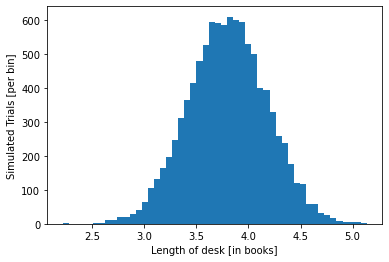

In [8]:
_ = plt.hist(l_sim, bins=50)
_ = plt.xlabel("Length of desk [in books]")
_ = plt.ylabel("Simulated Trials [per bin]")

Fractional Change: -0.00 +- 0.10


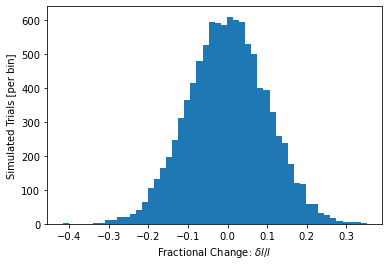

In [9]:
_ = plt.hist((l_sim/l_m)-1, bins=50)
_ = plt.xlabel(r'Fractional Change: $\delta l / l$')
_ = plt.ylabel("Simulated Trials [per bin]")
print("Fractional Change: %0.2f +- %0.2f" % (np.mean((l_sim/l_m)-1), np.std((l_sim/l_m)-1)))

# Effect on Area measurement

Now we are going to compute the distribution of area measurements we would get from those measurement of $l$.

Pro-tip: even though w_m, B_m and C_m are simple numbers and l_sim is actually an array of 10000 numbers, numpy is smart enough to know that it should compute 10000 values for A_sim_1 and dA_over_A_sim_1

### Case 1, effect of uncertainty on l

Here we are just using the l_sim values we plotted above to simulate what would happen if we measured different values of l.  (I.e., the length of the desk as measured in books).

Note that the width of the distribution of the relative change in the value of A is 0.10 or 10%

In [10]:
# Here we are going to compute the resulting relative change in A
A_sim_1 = deskArea(w_m, l_sim, B_m, C_m)
dA_over_A_sim_1 = (A_sim_1 - A_m)/A_m

Fractional Change: -0.00 +- 0.10


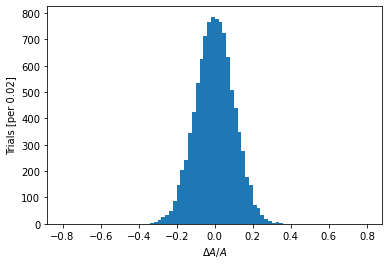

In [11]:
_ = plt.hist(dA_over_A_sim_1, bins=np.linspace(-0.8, 0.8, 81))
_ = plt.xlabel(r'$\Delta A / A$')
_ = plt.ylabel(r'Trials [per 0.02]')
print("Fractional Change: %0.2f +- %0.2f" % (np.mean(dA_over_A_sim_1), np.std(dA_over_A_sim_1)))

### Case 2, effect of uncertainty on C

In this case we are going to simulate what happends if we had used a different value of C, the length of the card we used to measure the book.

When we do this we find that the width of the distribution of the relative change in the value of A is 0.20 or 20%

Fractional Change: 0.01 +- 0.20


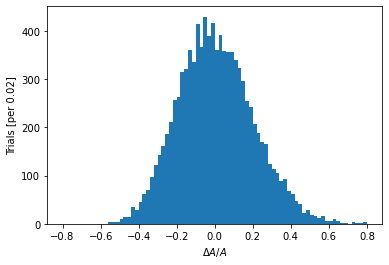

In [12]:
C_sim = np.random.normal(loc=C_m, scale=0.1*C_m, size=10000)
A_sim_2 = deskArea(w_m, l_m, B_m, C_sim)
dA_over_A_sim_2 = (A_sim_2 - A_m)/A_m
_ = plt.hist(dA_over_A_sim_2, bins=np.linspace(-0.8, 0.8, 81))
_ = plt.xlabel(r'$\Delta A / A$')
_ = plt.ylabel(r'Trials [per 0.02]')
print("Fractional Change: %0.2f +- %0.2f" % (np.mean(dA_over_A_sim_2), np.std(dA_over_A_sim_2)))

### Case 3, effect of combined uncertainty on l and w

In this case we are going to simulate what happends if we had found different values of both l and w, ie., the length and width of the desk, as measured in books.

When we do this we find that the width of the distribution of the relative change in the value of A is 0.14 or 14%

Fractional Change: 0.00 +- 0.14


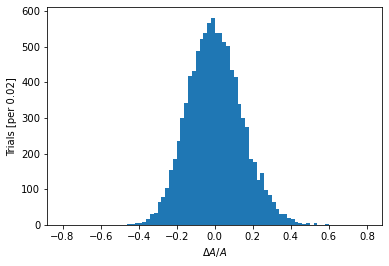

In [13]:
w_sim = np.random.normal(loc=w_m, scale=0.1*w_m, size=10000)
A_sim_3 = deskArea(w_sim, l_sim, B_m, C_m)
dA_over_A_sim_3 = (A_sim_3 - A_m)/A_m
_ = plt.hist(dA_over_A_sim_3, bins=np.linspace(-0.8, 0.8, 81))
_ = plt.xlabel(r'$\Delta A / A$')
_ = plt.ylabel(r'Trials [per 0.02]')
print("Fractional Change: %0.2f +- %0.2f" % (np.mean(dA_over_A_sim_3), np.std(dA_over_A_sim_3)))

### Mathematical formulas

(These formula and their derivations can be found in the Hughes and Hase text.  Note however that they use slightly different notation, mainly using $\alpha$ where we use $\delta$.)

For now, and for the next couple weeks we are going to assume that the variables we are measuring all independent of each other.  I.e., our measurement of $w$ did not somehow depend on $l$.  For this particular example, that is almost certainly true.

For those of you comfortable with partial derivatives and summation, the formula for propagation of errors given a set of measurements of **_independent_** quantities $x_i$ with uncertainties $\delta_i$ that can be used to compute a quantity $f(x_i)$ is:

$\sigma_f^{2}(\bf{x}) = \sum_i (\frac{\partial f}{\partial x_i} \delta_i)^2$

Where:

$\sigma_f^2(\bf{x})$ is the variance (i.e., the square of the standard deviation) of distibution of the $f$, the quantity that we are trying to compute. 

And you should evaluate the partial derivates of $f$ at the central value of $f$. 

**You might also note that this looks sort of like an extension of measuring distances when you move in multiple axes on a grid.  The sum to the total distance you move is the sum of the squares of the distance you move along each grid dimension.**


In our case, $f = A$ is the area of the desk, and the $x_i$ are the things we measured, namely: $w, l, B, C$.  

Note that you should evaluate the partial derivatives of $f$ at the central value of $f$.

In our case, this means that 

$\sigma_A^2 = (\frac{\partial f}{\partial l} \delta l)^2 + (\frac{\partial f}{\partial w} \delta w)^2 + (\frac{\partial f}{\partial B} \delta B)^2 + (\frac{\partial f}{\partial C} \delta C)^2$

**This equation is the main reason that variances are so useful: it says that if you believe that your input measurements are scattered around the true values according to their variances, you have a straightforward formula for the variance of the quanity that you care about, that the square root of the variance on that quantity will tell you how much scatter to expect to see if you performed the measurement many times.  _In short, that can serve as a very good estimate on the uncertainty of the quantity you care about_.**

Recall that in our case $A = w l B^2 C^2$.

Taking the partial derivatives and dividing by $A$ gives four terms in the equation are that are going to get squared, which are:

$\frac{\partial f}{\partial l} \delta l = \delta l \frac{w B^2 C^2}{l w B^2 C^2} = \frac{\delta l}{l}$

$\frac{\partial f}{\partial w} \delta w = \delta w \frac{w l B^2 C^2}{l w B^2 C^2} = \frac{\delta w}{w}$

$\frac{\partial f}{\partial B} \delta B = \delta B \frac{2 l w B C^2}{l w B^2 C^2} = \frac{2 \delta B}{B}$

$\frac{\partial f}{\partial C} \delta C = \delta C \frac{2 l w B^2 C}{l w B^2 C^2} = \frac{2 \delta C}{C}$


Putting it all together give use this:

$(\frac{\sigma_A}{A})^2 = (\frac{\delta l}{l})^2 + (\frac{\delta w}{w})^2 + (2 \frac{\delta B}{B})^2 + (2 \frac{\delta C}{C})^2$

$\frac{\delta A}{A} = \frac{\sigma_A}{A} = ((\frac{\delta l}{l})^2 + (\frac{\delta w}{w})^2 + (2 \frac{\delta B}{B})^2 + (2 \frac{\delta C}{C})^2)^{1/2}$ 

Adding the squares of quantities and then taking the square root of the sum is often referred to as "adding in quadrature".

What we have just discovered are two extremely useful rules for error propgation:

1. If a quantity is the product (i.e., multiplication) of a bunch of measurements, you can add the relative errors of those measurements in quadrature to estimate the relative uncertainty on the quantity of interest.

2. If a quantity depends on a measurement to some power, then you should multiply the relative contribution for that term by that power. 

There is a extremely useful third rule, which we actually saw in an earlier notebook, but didn't comment on:

3. If a quantity is the sum (i.e., addition) of a bunch of measurements, you can add the aboslute errors of those measurements in quadrature to estimate the aboslute uncertainty on the quantity of interest.

**These three rules all you need to do error propagation in many, many cases.**


# Question for discussion.

7.1 Connect the three figures we made above (cases 1, 2 and 3) to the formula for propagation of error given just above.  Explain what corresponds to what, and if the numerical results that we got match the formula.  Also explain the difference in the outcomes in the three cases in simple English.

# Example use case, computing the power output of a distant light source

In astronomy and astrophysics, we can write down a formula for the "energy flux" i.e., the amount of energy captured in our detector in a given area in a given time, from a distance light source (i.e., a star or galaxy or other astronomical source):

$F_{\rm E} = \frac{\hat{E}_{\gamma}*n_{\gamma}}{A*\eta*t}$ 

Where: 

$F_{\rm E}$ is the "energy flux"

$n_{\gamma}$ is the number of photons we detected

$\hat{E}_{\gamma}$ is the average photon energy

$A$ is the area of the detector (assuming that it is pointed at the source).

$\eta$ is the total efficiency of the detector (this includes accounting for things like some of the light being absorbed or reflected in the atmosphere).

$t$ is the exposure or observation time, i.e., how long we pointed at the source.

The units of energy flux are $J m^{-2} s^{-1}$, i.e., Energy per unit area, per unit time.


The total power from the astrophysics source is the total energy per second crossing the surface of a sphere centered on the source.  


$P = 4 * pi * d^2 * F_{\rm E} = 4 * pi * d^2 \frac{\hat{E}_{\gamma}*n_{\gamma}}{A*\eta*t}$

The units of power are $\frac{J}{s} = W$

# Exercises.

Compute the relative unceratinty on total power output by a source for two different observations.  Show your work!

E.2  Observing the sun with a simple photo-detector.  In this case let's assume that:

1. The uncertainty on the $n_{\gamma}$ is about 2\%, this estimate might come from making repeated measurements and studying the variation, i.e., $\frac{\delta n_{\gamma}}{n_{\gamma}} = 0.02$,
2. The uncertainty on $\hat{E}_{\gamma}$ is 3\%, i.e., $\frac{\delta \hat{E}_{\gamma}}{\hat{E}_{\gamma}} = 0.03$, this number might come from seperate measurement of the spectrum of sunlight.
3. The area of the photodetector is very well known, and it's uncertainty can be ignored.
4. The efficiency of the photodetector is only known to about 2\%.  This number probably came from calibrating the photodetector with light of well-known brightness.
5. The observation time is very well known.
6. The distance to the sun is very well known.


E.3 Observing the distant Gamma-ray pulsar Vela with a space-based telescope that is sensitive to gamma-rays. In this case let's assume:

1. The uncertainty on the $n_{\gamma}$ is about 7\%.
2. The uncertainty on $\hat{E}_{\gamma}$ is 5\%.
3. The area of the telescope is very well known, and it's uncertainty can be ignored.
4. The efficiency of the telescope is only known to about 5\%. 
5. The observation time is very well known.  
6. The distance to Vela is only known to 20%.

(Special note, while the sun emits light equally in all directions, we know that Vela does not, so using this equation for the power is wrong, but let's just ignore that for now.)